L3T12 Capstone Project

The code for this project is provided here. 
The task folder also contains an MS Word document which summarises the analysis.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# loading UsArrests dataset
df = pd.read_csv('UsArrests.csv')
df.head(10)

# The data contains information about states in the US, including the % living in urban areas 
# and the arrests per 100 000 pop for murder, assault and rape in 1973.  

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
# Note that the variable relating to US State is called "City" rather than "State"
# Changing this to avoid confusion

df.rename(columns= {'City':'State'}, inplace=True)
df = df.set_index('State')
df.head()


,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
# Exploring the data by viewing summary statistics
df.describe()
# there are 50 records in each column - corresponding to 50 states
# Note that the mean values for the variables differ significantly, 
# indicating that it will be useful to scale the data. 

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
# Looking for missing values
df.isnull().sum()

# no missing values 

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
#  Viewing the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

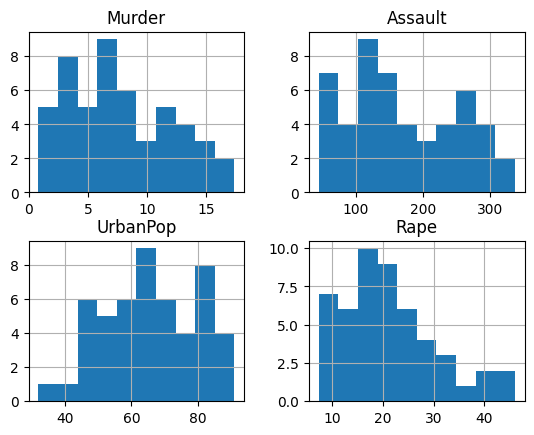

In [7]:
# visualising data by plotting histograms for the variables 
df.hist()
# We can tell that most of the urban population plot data sits beyond 50%, 
# this is in keeping with the mean for this variable. 


In [8]:
# now we will work on the PCA beginning with correlation analysis. 


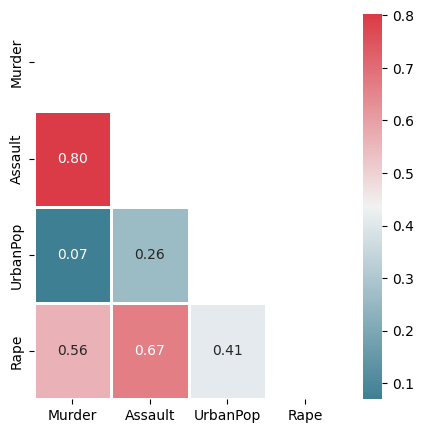

In [9]:
# getting correlations
corrs = df.corr(numeric_only=True)
labels = corrs.columns

colormap = sns.diverging_palette(220,10, as_cmap=True) # specify colormap
fig, ax = plt.subplots(figsize=(5,5))  # fig size

# to mask mirrored side of heatmap
dropSelf = np.zeros_like(corrs)
dropSelf[np.triu_indices_from(dropSelf)] = True

# generate heatmap
sns.heatmap(corrs,cmap=colormap,annot=True, fmt='.2f',mask=dropSelf,linewidth=2)
plt.show()

# from the heatmap, we can see that murder and assault have a high 
# positive correlation. 
# Rape and assault also have a positive correlation 
# There are no negative correlations identified. 

In [10]:
# scaling the data before performing PCA

X = StandardScaler().fit_transform(df.values)


In [11]:
# Perform PCA without specifying n_components so that we can work out what 
# n_components to assign.

pca = PCA()

# obtain components
principal_comp = pca.fit_transform(X)

# transform components into new df
pca_df = pd.DataFrame(principal_comp,index= df.index)

pca_df.head(6)


,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996
Colorado,1.514563,-0.987555,1.095007,0.001465


In [12]:
states = df.index

In [13]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(14,9))   

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

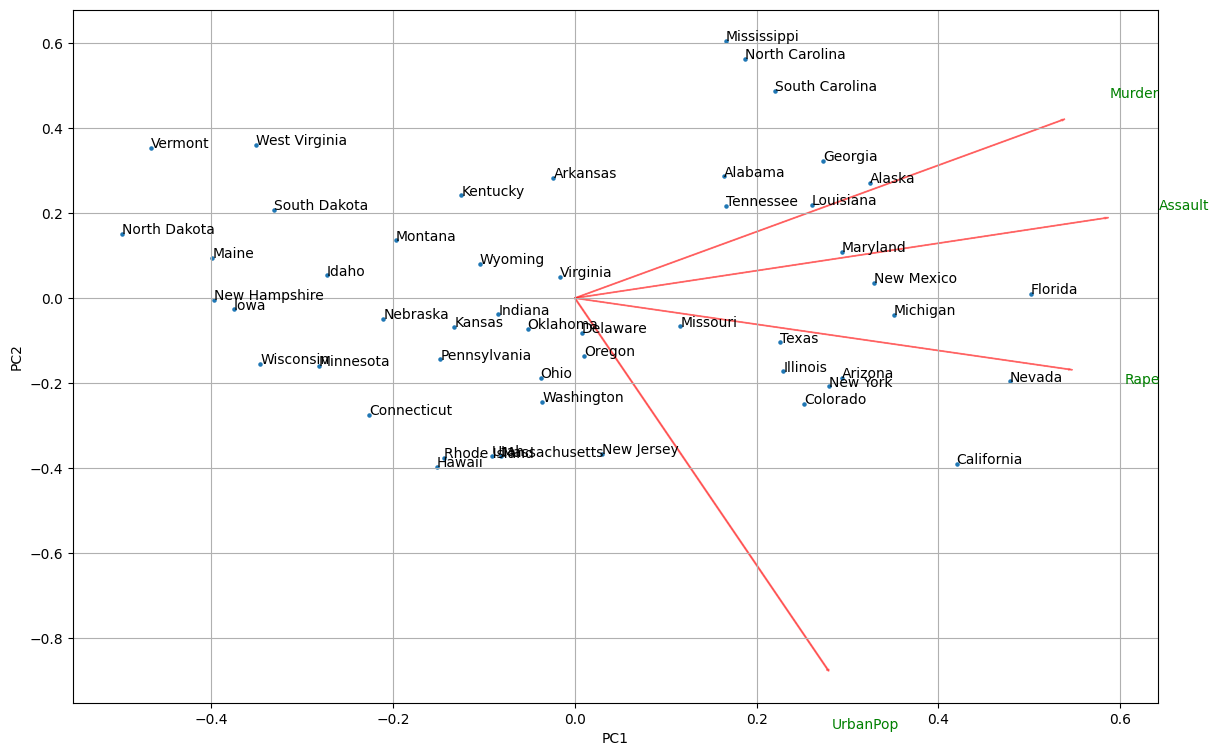

In [14]:
biplot(principal_comp[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels)
       ,list(states))
plt.show()

The plot shows that are all 4 variables are on the right of the plot. 
The murder, assault and rape variables have high loading values for PC1.
This could mean that PC1 relates to states with high crime in general. 

Urban Population has a high negative value for PC2. This could mean that PC2
relates to the "urban-ness of a state. 

In [15]:
# Feature Importance

pc1 = abs( pca.components_[0] ) 
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


For the PC1, we can see that murder, assault and rape all have similar importance.
For PC2, we see that urban population has the highest importance. 


In [16]:
# investigating the explained variance:

expl_variance = pca.explained_variance_ratio_
expl_df = pd.DataFrame(expl_variance, index=['PC1','PC2','PC3','PC4'])
expl_df

# https://vitalflux.com/pca-explained-variance-concept-python-example/

,0
PC1,0.620060
PC2,0.247441
PC3,0.089141
PC4,0.043358


This tells us the 1st PC explains 62% of the variance, the second PC explains 25%. 
The third PC explains 9%, the fourth PC explains 4%
We can plot this on a biplot. 

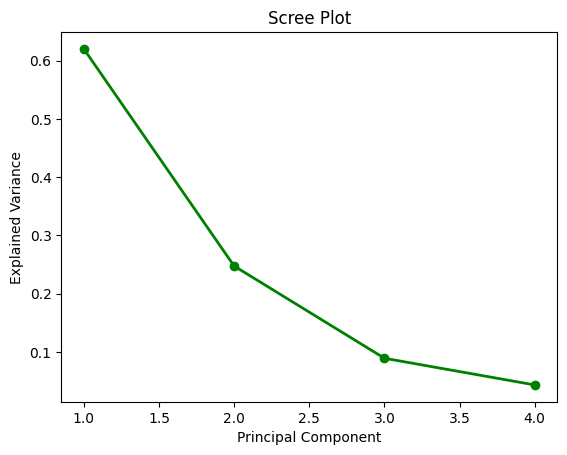

In [17]:
# constructing a scree plot to help decide on the number of components to keep

PC_values = np.arange(pca.n_components_)+ 1
plt.plot(PC_values,expl_variance,'o-', linewidth=2, color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()


# References:
# https://statisticsglobe.com/scree-plot-pca
# https://www.statology.org/scree-plot-python/




Using the "Elbow" method to determine the number of components, 
we would keep the first three principal components. 

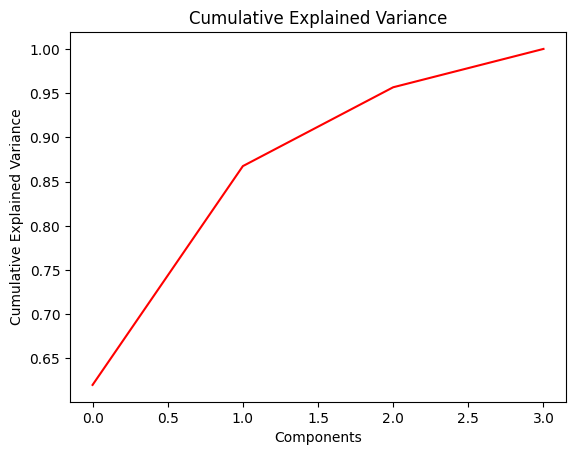

In [18]:
# plot showing cumulative explained variance

cum_sum_eigen = np.cumsum(expl_variance)
plt.plot(cum_sum_eigen, color='red')
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Explained Variance")
plt.show()

# In this plot we can see that the first 3 PC explains above 95% of the variance. 

In [19]:
# The ideal n_components is 3 for this dataset. 
# Doing the PCA analysis and specifying n_components = 3. 

nr_comps = 3
pca2 = PCA(nr_comps)

# obtain components
principal_comp = pca2.fit_transform(X)

# transform components into new df
pca2_df = pd.DataFrame(principal_comp,index= df.index)

pca2_df.head(6)

,0,1,2
State,,,
Alabama,0.985566,1.133392,-0.444269
Alaska,1.950138,1.073213,2.040003
Arizona,1.763164,-0.745957,0.054781
Arkansas,-0.141420,1.119797,0.114574
California,2.523980,-1.542934,0.598557
Colorado,1.514563,-0.987555,1.095007


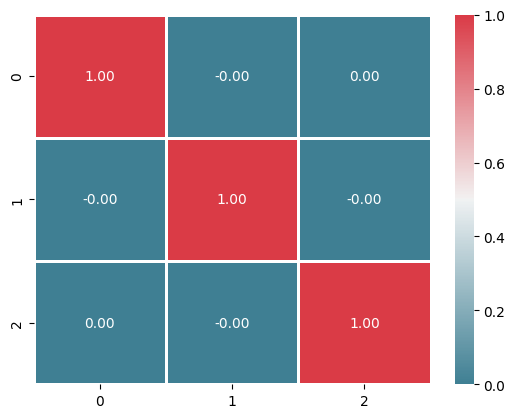

In [20]:
# Now plotting the transformed data 
ax = sns.heatmap(pca2_df.corr(), cmap=colormap, annot=True, fmt='.2f',linewidth=1)
plt.show()

# None of the components are correlated with each other. 

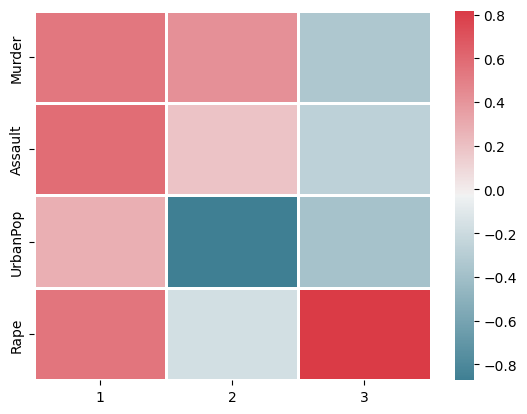

In [21]:
# now visualising with the original
components = pd.DataFrame(pca2.components_, columns=df.columns,
                          index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()


This shows that PC1 has high +ve correlation with murder, rape and assault as 
we saw in the biplot earlier. We can also see the high negative correlation of 
PC2 with Urban Population. 
The biplot only plots PC1 and PC2, so we did not appreciate the 
relationship that we are seeing here between PC3 and rape which shows 
high +ve correlation. This could reflect that PC3 refers to a particular 
type of crime - e.g. sexual assault

In [22]:
# Repeating the Feature Importance to see PC3

pc1 = abs( pca.components_[0] ) 
pc2 = abs( pca.components_[1] )
pc3 = abs(pca.components_[2])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df["PC3 Importance"] = pc3
feat_df

,Features,PC1 Importance,PC2 Importance,PC3 Importance
0,Murder,0.535899,0.418181,0.341233
1,Assault,0.583184,0.187986,0.268148
2,UrbanPop,0.278191,0.872806,0.378016
3,Rape,0.543432,0.167319,0.817778


We can see that for PC3, rape has the highest importance. This confirms what we
observed in the heatmap above. 

In [23]:
# Now will perform clustering analysis
# Starting with Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


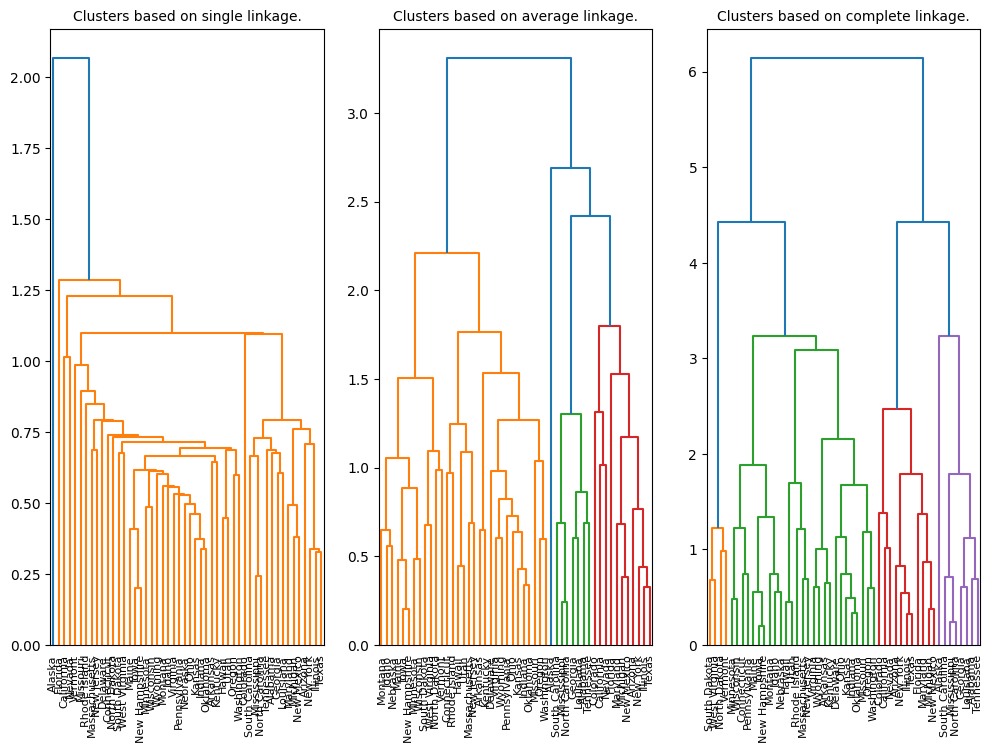

In [24]:
# We will use Euclidean distance and look at the difference between clusters
# using single, average and complete linkage. 

plt.figure(figsize=(12,8))
linkage_types = ['single', 'average', 'complete']

for i, l in enumerate(linkage_types):
    plt.subplot(1,3, i+1)
    dend = dendrogram(linkage(pca2_df,method=l), labels=pca2_df.index)
    plt.title(f'Clusters based on {l} linkage.',fontsize=10)
  

Text(0.5, 1.0, 'Clusters based on complete linkage.')

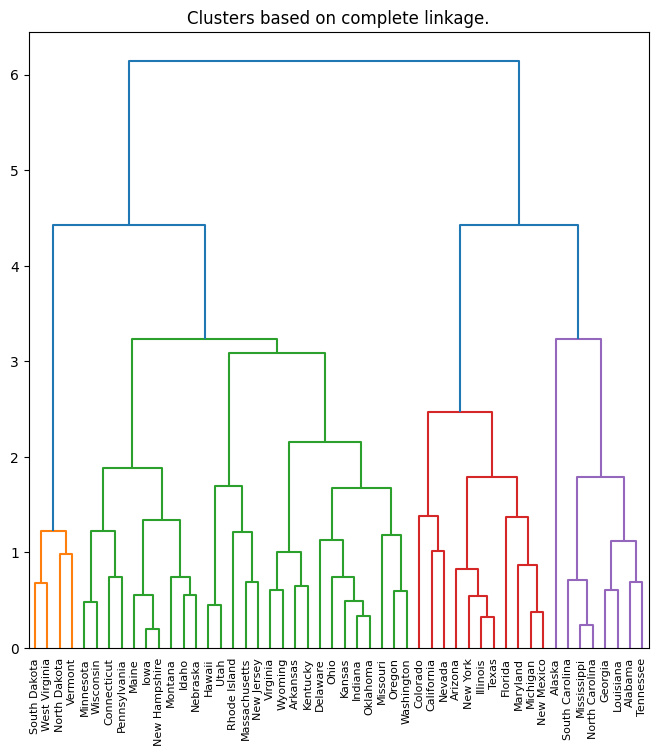

In [25]:
# Viewing only complete linkage which appears to be the dendrogram that creates 
# the most dispersion of clusters. 

plt.figure(figsize=(8,8))
dend = dendrogram(linkage(pca2_df,method='complete'), labels=pca2_df.index)
plt.title('Clusters based on complete linkage.')

# From the dendrogram we see that there are 4 clusters. 

In [26]:
# Now will do K means clustering and specify K = 4. 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4)

# fit to the data
label = kmeans.fit_predict(principal_comp)


# https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f#:~:text=fit()%20method%20will%20fit,don't%20have%20labelled%20inputs.
# https://www.statology.org/k-means-clustering-in-python/


c:\Users\sadiyya.sheik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


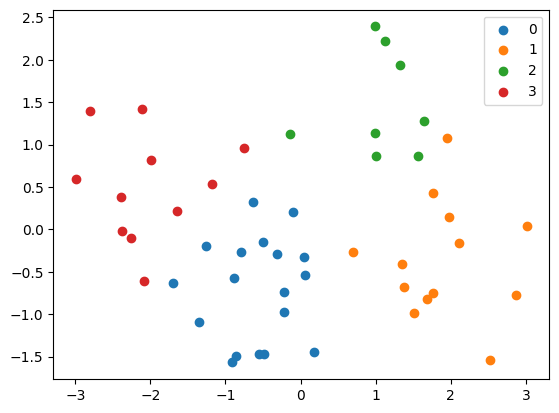

In [27]:
# plotting the cluster

# getting unique labels:
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(principal_comp[label==i, 0],principal_comp[label== i, 1], 
                label= i )

plt.legend()
plt.show()

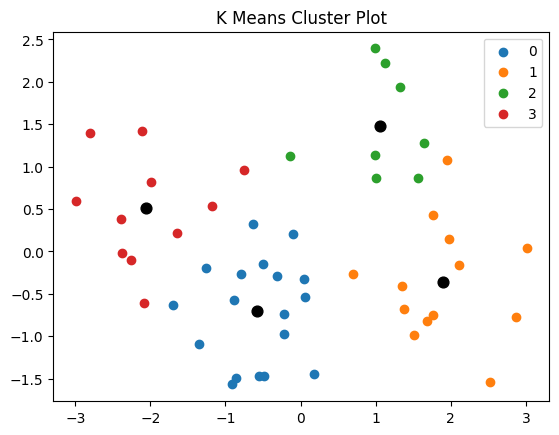

In [28]:
# getting the centroids 
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# now plotting with the rest 

for i in u_labels:
    plt.scatter(principal_comp[label ==i, 0], principal_comp[label==i, 1], 
                label = i)
plt.scatter(centroids[:,0], centroids[:,1], s =60, color='black')
plt.title('K Means Cluster Plot')
plt.legend()
plt.show()

# https://www.askpython.com/python/examples/plot-k-means-clusters-python

In [29]:
# Determining the Silhouette SCore 

from sklearn.metrics import silhouette_score

score = silhouette_score(principal_comp, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.37141226605380623


c:\Users\sadiyya.sheik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


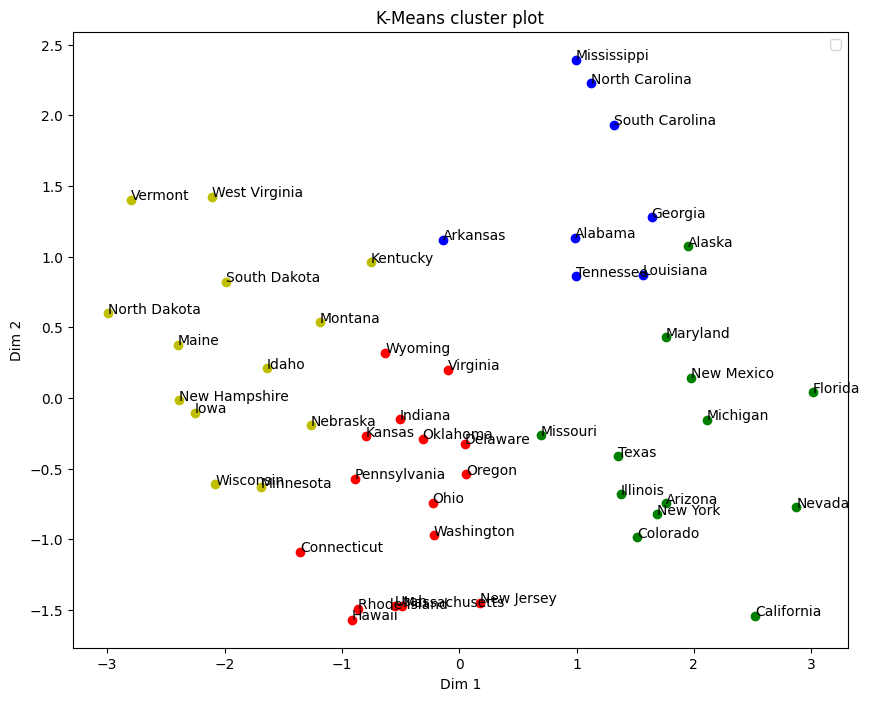

In [30]:
# Another method of viewing K means plot - with the data labels

# We extract the first two components
x = principal_comp[:,0]
y = principal_comp[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca2_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(10,8))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.legend()

In this plot we can see the states that are in the same cluster. For eg, we see again that West Virgina, South Dakota, Vermont and North Dakota are in the same cluster. However, there are other states that are also included with them in the same cluster: e.g. Maine, Idaho, New Hampshire. 
We can also visualise the states that have a state from a different cluster as its closest data point indicating the overlap between the clusters that we noted earlier via the silhouette score. 

Interpretation of the four clusters:
The yellow cluster appears to refer to states that have low % urban population and low crime levels. 
The blue cluster appears to refer to states that have low % urban population and high crime levels. 
The green cluster appears to refer to states that have high % urban population and high crime levels. 
The red cluster appears to refer to states that have high % urban population and the crime levels are moderate (i.e. neither high nor low)

In [45]:
df.loc[['North Dakota','California','Connecticut', 'Mississippi']]

,Murder,Assault,UrbanPop,Rape
State,,,,
North Dakota,0.8,45,44,7.3
California,9.0,276,91,40.6
Connecticut,3.3,110,77,11.1
Mississippi,16.1,259,44,17.1


In [46]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In the subset of the df above, I have selected 1 state from each cluster to view the original data. 
When we compare this with the mean values for each variable, we can see that the interpretation of the clusters holds. 